# Course Project: Titanic Exploratory Data Analysis and Model
The problem:
Perform an exploratory data analysis (EDA) on the 'Titanic' dataset and build a model to predict survival based on the information about the passengers.

During the EDA, your goal is to understand the data, missing values, and relationships. A common practice is to ask questions relevant to the problem and explain what you see.

Your goal is to build a document that reads like a story, beginning, middle, and end. It should include findings even if the conclusion is something like this: "Based on our analysis, there is no indication that this variable influences the Survival."

Your grade will not depend on the absolute 'error' of the final model. Instead, the focus is where you started and what steps you took to improve it.

Many factors influence final performance based on the ML algorithm selected. Your report should include work focusing on these areas:

Load the data and formulate some hypotheses about it.

Summarize or visualize the data and explain the findings.

Explore opportunities for 'Feature engineering,' trying to create new features from the original data.

Build and tune the model. (We are providing a sample code for this part so you can adjust it.)

Here is a sequence that you can use as a starting point for the EDA.

Section 1. Basic Hypothesis formulation
Here are a few questions to explore:

A. Questions about features (Predictors)
Is the size of the group a determinant factor in the survival of the accident?
How is survival influenced based on passenger class?
How does age influence survival?

B. Questions about ways to complete missing data.
Can I use the person title listed in the ticket to estimate age?
Can I use the passenger gender to estimate age?

C. Map two feature against survival
How can we see the effect of 'Group size' and 'Age' on chances of survival?

Section 2. Feature Engineering
A. Creating new features
Can I use ticket information to generate information about the passenger's location on the ship?
Can we extract information about the title to assign passengers into groups like 'members of clergy,' 'widows,' 'soldiers,' etc.?

Section 3. Summarize the findings with plots.
For each hypothesis, you have selected, create a visual representation to help confirm or reject the original premise.

Section 4. Build an initial prediction model for surviving the accident.
Using the template code provided, create a model using at least six features and comment on your findings.

Section 5. Tune the prediction model.
Using the template code provided, adjust the values of the hyperparameters.

Section 6. Final Notes.
Complete your report stating a summary of the conclusions and suggesting next steps.

----------------------------------------------------------------------------------------------------------------------------------------------

Historically, Titanic was accused that helped to survive only rich people. So, I guess richer people could survived more. 
Also, in general, survival rate is related to the age and sex. Let's see how data proves it.

In [1]:
import enum
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from IPython.display import display, HTML
from IPython.display import Math, Latex

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [2]:
class Fld(enum.Enum):
    PassengerId = 0;  Survived = 1;   Pclass = 2; Name = 3;  Sex = 4
    Age = 5;          SibSp = 6;      Parch = 7;  Ticket = 8; Fare = 9;  
    Cabin = 10;       Embarked = 11


def load_titanic_csv(file_name):
    data = []
    with open(file_name, newline='') as csv_file:
        line_reader = csv.reader(csv_file, delimiter=',', quotechar='"')
        first_line = True
        for row in line_reader:
            if first_line:
                first_line = False
                continue
            data.append(row)
    return data


def get_field(row, field_name):
    idx = field_name.value
    return row[idx]


def print_row(row):
    for idx, field in enumerate(Fld):
        fld_name = field.name
        print('{0:<2}: {1:<12} = {2}'.format(idx, fld_name, row[idx]))
    
def print_titanic_fields():
    for idx, field in enumerate(Fld):
        if idx % 4 == 0:
            print(' ')
        print('{0:<2}: {1:<15}'.format(idx, field), end='\t')


In [3]:
##"C:\Users\yoko\Documents\UCSCEX\Winter2022\DBDA.X427\07-goodies\train.csv"

In [4]:
# Loads the data.
data = load_titanic_csv('C:/Users/yoko/Documents/UCSCEX/Winter2022/DBDA.X427/07-goodies/train.csv')
test_df = pd.read_csv("C:/Users/yoko/Documents/UCSCEX/Winter2022/DBDA.X427/05-titanic-part-02/data/test.csv")

In [5]:
titanic_df = pd.read_csv("C:/Users/yoko/Documents/UCSCEX/Winter2022/DBDA.X427/07-goodies/train.csv")
print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [7]:
titanic_df = pd.read_csv("C:/Users/yoko/Documents/UCSCEX/Winter2022/DBDA.X427/07-goodies/train.csv")
titanic_df.shape

(891, 12)

In [8]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
titanic_df_groupby_survived =titanic_df.groupby('Survived')

In [11]:
titanic_df_groupby_survived.size()

Survived
0    549
1    342
dtype: int64

In [12]:
titanic_df_groupby_parch =titanic_df.groupby('Parch')
titanic_df_groupby_parch.size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [13]:
titanic_df_groupby_embarked =titanic_df.groupby('Embarked')
titanic_df_groupby_embarked.size()

Embarked
C    168
Q     77
S    644
dtype: int64

A. Questions about features (Predictors)

Is the size of the group a determinant factor in the survival of the accident?
How is survival influenced based on passenger class?
How does age influence survival?

In [14]:
titanic_df_groupby_sibsp =titanic_df.groupby('SibSp')
titanic_df_groupby_sibsp.size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [15]:
titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).sum()

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


In [16]:
titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


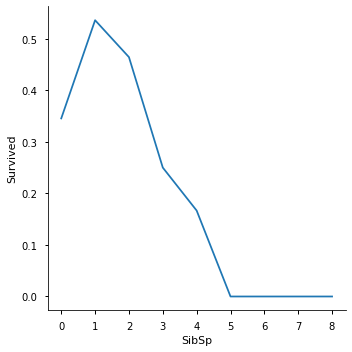

In [17]:
axes = sns.relplot(x="SibSp", y="Survived", kind="line", ci=None, data=titanic_df)

People with one family member seems like the hiest possibilyty to survive.
Big group couldn't survive.

How is survival influenced based on passenger class?

In [18]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [19]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Higher class, higher survival rate.

How does age influence survival?

Text(0.5, 1.0, 'age_survivalrate')

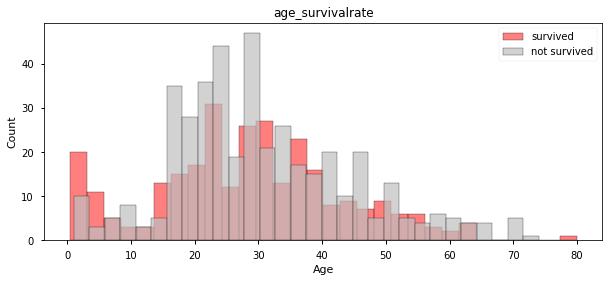

In [20]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax = sns.histplot(titanic_df[titanic_df['Survived']==1].Age.dropna(), bins=30, 
                  label=survived, kde=False, color="r", alpha=0.5)
ax = sns.histplot(titanic_df[titanic_df['Survived']==0].Age.dropna(), bins=30, 
                  label=not_survived, kde=False, color="silver", alpha=0.7)
ax.legend()
ax.set_title('age_survivalrate')

Text(0.5, 1.0, 'Age_Survived')

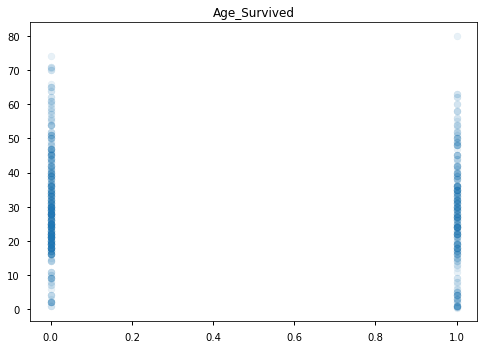

In [21]:
plt.scatter(titanic_df.Survived, titanic_df.Age, alpha=0.1)  
plt.title("Age_Survived")

From the graphs above, it seems like infants and toddler have higher survival rate than other selfworkable ages. 
Also most of the elderies couldn't survive or probably they priored to survive younger people. 
Therefore, I guess the infants and 80 years old who survived had the higher fare /Pclass, and age didn't effect a lot on the survival rate.

B. Questions about ways to complete missing data.
Can I use the person title listed in the ticket to estimate age?
Can I use the passenger gender to estimate age?

In [22]:
titanic_df['title'] =  titanic_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_df['title'] =  test_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
grouped_title = titanic_df.groupby(['title'])
grouped_title.Age.median()

title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

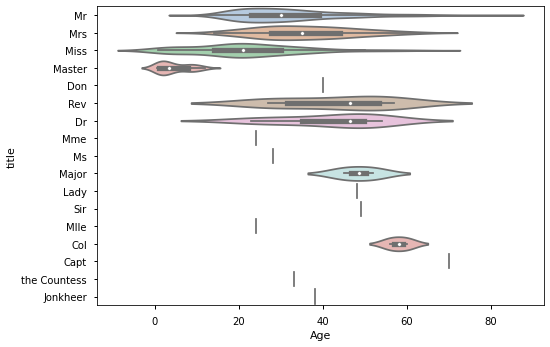

In [23]:
ax = sns.violinplot(y="title", x="Age", palette='pastel', data=titanic_df, saturation=0.5, scale="width")


For "Master", "Major", "Col", I can use the person title to estimate the age. However, I cannot use "Mr", "Mrs", "Miss","Rev", "Dr" to eatimate age because the range is over the generations. "Don", "Mme", "Ms", "Lady", "Sir", "Mlle", "Capt", "the Cauntess", "Jpnkheer" doesn't have enough samples to conclude whether I can use or not.

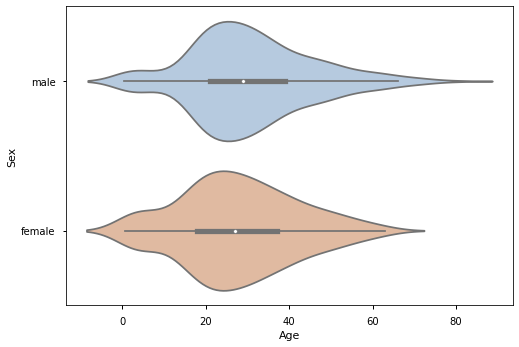

In [24]:
ax = sns.violinplot(y="Sex", x="Age", palette='pastel', data=titanic_df, saturation=0.5, scale="width")


Both males and females ages' range is wide. I connot estimate the age from gender.

C. Map two feature against survival

How can we see the effect of 'Group size' and 'Age' on chances of survival?

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

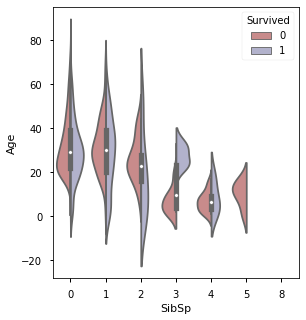

In [25]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

custom_colors = ["#e76c6c","#a5a5d9"]
pastel = 'pastel'
sns.violinplot(
    x="SibSp", y="Age", hue="Survived", data=titanic_df, split=True, ax=ax1, 
    palette=custom_colors, 
    saturation=0.5)

From the graph above, obviously, bigger groups are younger. However, as same results as I explored at SectionA, bigger groups are hardly survived. Thus, this result supports the hypothesis which I had from SectionA that Pclass or Fare have more influences on the survival rate rather than age does.

Section 2. Feature Engineering

A. Creating new features
Can I use ticket information to generate information about the passenger's location on the ship?
Can we extract information about the title to assign passengers into groups like 'members of clergy,' 'widows,' 'soldiers,' etc.?


In [26]:
titanic_df[['Pclass','Ticket', 'Cabin','Fare','Embarked']]

,Pclass,Ticket,Cabin,Fare,Embarked
0,3,A/5 21171,NaN,7.2500,S
1,1,PC 17599,C85,71.2833,C
2,3,STON/O2. 3101282,NaN,7.9250,S
3,1,113803,C123,53.1000,S
4,3,373450,NaN,8.0500,S
...,...,...,...,...,...
886,2,211536,NaN,13.0000,S
887,1,112053,B42,30.0000,S
888,3,W./C. 6607,NaN,23.4500,S
889,1,111369,C148,30.0000,C


In [27]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna("U0")
titanic_df['Location'] =  titanic_df.Cabin.apply(lambda cabin: re.compile("([a-zA-Z])").search(cabin).group())
titanic_df['Location']

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Location, Length: 891, dtype: object

In [28]:
titanic_df[titanic_df['Cabin'].notna()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Location
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,Mr,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,Miss,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,Mr,U
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U0,Q,Mr,U
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U0,S,Master,U
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U0,S,Mrs,U
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U0,C,Mrs,U


Can we extract information about the title to assign passengers into groups like 'members of clergy,' 'widows,' 'soldiers,' etc.?


In [29]:
normalized_titles = {
    "Capt":       "Soldiers",
    "Col":        "Soldiers",
    "Major":      "Soldiers",
    
    "Dr":         "Dr",
    
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Dona":       "Royalty",
    "Sir" :       "Royalty",
    "Lady" :      "Royalty",
    "the Countess":"Royalty",
    
    "Rev":        "Clergy",
    
    "Mme":        "Layperson",
    "Mlle":       "Layperson",
    "Ms":         "Layperson",
    "Mr" :        "Layperson",
    "Mrs" :       "Layperson",
    "Miss" :      "Layperson",
    "Master" :    "Layperson"
}

titanic_df['titleGroup'] = titanic_df.title.map(normalized_titles)
test_df['titleGroup'] = test_df.title.map(normalized_titles)
titanic_df['titleGroup']

0      Layperson
1      Layperson
2      Layperson
3      Layperson
4      Layperson
         ...    
886       Clergy
887    Layperson
888    Layperson
889    Layperson
890    Layperson
Name: titleGroup, Length: 891, dtype: object

Section 3. Summarize the findings with plots.

For each hypothesis, you have selected, create a visual representation to help confirm or reject the original premise.

In [30]:
titanic_df[['title', 'Survived']].groupby(['title'], as_index = False).mean()

,title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [31]:
titanic_df[['titleGroup', 'Survived']].groupby(['titleGroup'], as_index = False).mean()

,titleGroup,Survived
0,Clergy,0.000000
1,Dr,0.428571
2,Layperson,0.384793
3,Royalty,0.600000
4,Soldiers,0.400000


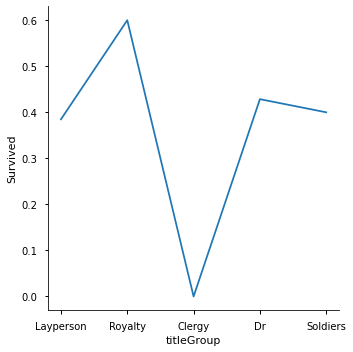

In [32]:
axes = sns.relplot(x="titleGroup", y="Survived", kind="line", ci=None, data=titanic_df)

People who works for God didn't survive. Title has a big influence on the survival rate. 
Military's survival rate is higher than layperson, I guess they know how to swim beter than others and touher,but is there another reason too? 

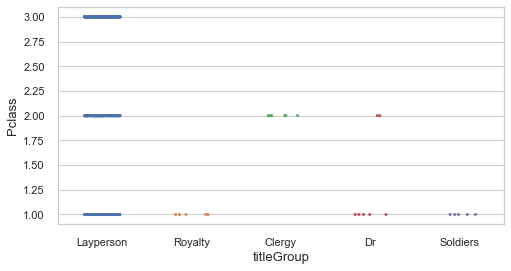

In [33]:
sns.set(style="whitegrid", color_codes=True)
x="titleGroup"; y="Pclass"
plt.figure(figsize=(8,4))
sns.stripplot(x=x, y=y, data=titanic_df, 
              jitter=0.2, 
              dodge=True,
              size=3)
plt.xlabel(x, fontsize=13)
plt.ylabel(y, fontsize=13)
plt.show();

Yes, there's another reason as you see the plot above, all of them were in first class.
Considering about Royals' high survival rate who also only in first class, militaly people's survival rate seems ralatively low.
I can assume the same reason as clergies had done.

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

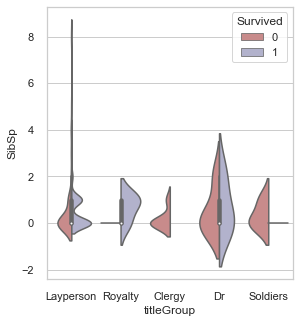

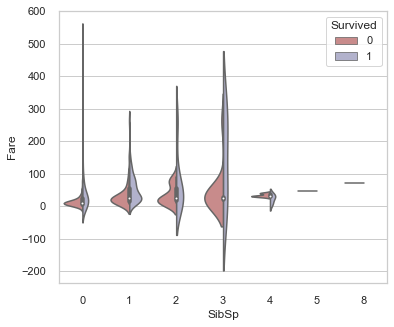

In [34]:
#Relation between family size and title
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

custom_colors = ["#e76c6c","#a5a5d9"]
pastel = 'pastel'
sns.violinplot(
    x="titleGroup", y="SibSp", hue="Survived", data=titanic_df, split=True, ax=ax1, 
    palette=custom_colors, 
    saturation=0.5)

#Relation between family size and fare
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)

custom_colors = ["#e76c6c","#a5a5d9"]
pastel = 'pastel'
sns.violinplot(
    x="SibSp", y="Fare", hue="Survived", data=titanic_df, split=True, ax=ax1, 
    palette=custom_colors, 
    saturation=0.5)

SibSp3 has an unique shape. The violinplot for the relation between SbSp, Age and survival had an unique shape, too(Section1.C).
What makes it unexpected shape?Let's see the details who were having 3family members.

In [35]:
sibsp3 = titanic_df[(titanic_df["SibSp"] == 3) | (titanic_df["SibSp"] == 3)]

sibsp3.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Location,titleGroup
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U0,S,Master,U,Layperson
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,U0,S,Miss,U,Layperson
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,C,Layperson
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,U0,S,Master,U,Layperson
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,U0,S,Mrs,U,Layperson
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,C,Layperson
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,U0,S,Master,U,Layperson
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,U0,S,Miss,U,Layperson
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,C,Layperson
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,U0,S,Miss,U,Layperson


2females of the family with 3people in first class survived, so now I can see why the graph's shape is unique though the survival rate of big family is low basically. 
Then there's another question. Is it just a coincidence that a young man with a first class ticket died? Or people in this era and region had chivalry?

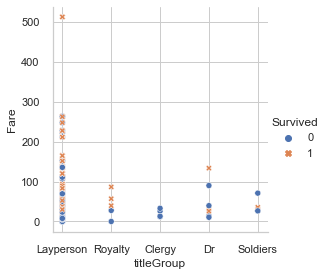

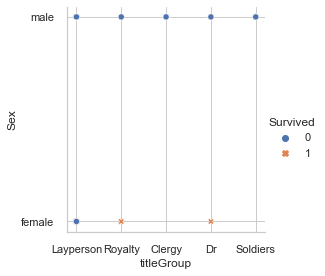

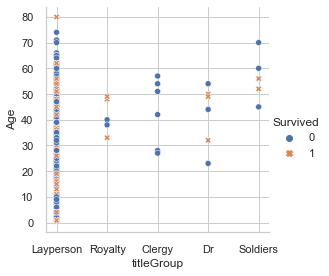

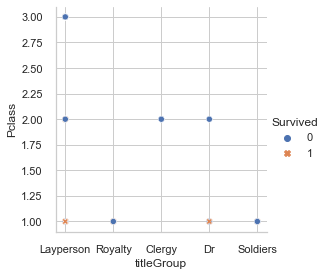

In [36]:
sns.relplot(
    x="titleGroup", y="Fare", hue="Survived", style="Survived",
    data=titanic_df, height=4);

sns.relplot(
    x="titleGroup", y="Sex", hue="Survived", style="Survived",
    data=titanic_df, height=4);

sns.relplot(
    x="titleGroup", y="Age", hue="Survived", style="Survived",
    data=titanic_df, height=4);

sns.relplot(
    x="titleGroup", y="Pclass", hue="Survived", style="Survived",
    data=titanic_df, height=4);

In [37]:
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


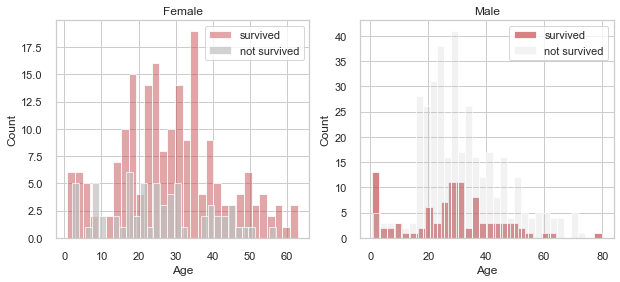

In [38]:
survived = 'survived'
not_survived = 'not survived'
female = titanic_df[titanic_df['Sex']=='female']
male = titanic_df[titanic_df['Sex']=='male']
# --- Graphs ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=30, 
                  label=survived, 
                  ax=axes[0], # First plot
                  kde=False, color="r", alpha=0.5)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[0], kde =False,
                  color="Silver", alpha=0.7)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(male[male['Survived']==1].Age.dropna(), bins=30, 
                  label = survived, 
                  ax = axes[1], # Second plot
                  kde = False, color="r", alpha=0.7)
ax = sns.histplot(male[male['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[1], kde = False,
                  color="Silver", alpha=0.2)
ax.legend()
_ = ax.set_title('Male')

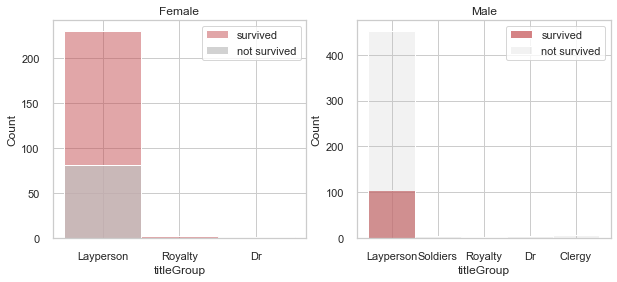

In [39]:
survived = 'survived'
not_survived = 'not survived'
female = titanic_df[titanic_df['Sex']=='female']
male = titanic_df[titanic_df['Sex']=='male']
# --- Graphs ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = sns.histplot(female[female['Survived']==1].titleGroup.dropna(), bins=30, 
                  label=survived, 
                  ax=axes[0], # First plot
                  kde=False, color="r", alpha=0.5)
ax = sns.histplot(female[female['Survived']==0].titleGroup.dropna(), bins=30, 
                  label = not_survived, ax = axes[0], kde =False,
                  color="Silver", alpha=0.7)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(male[male['Survived']==1].titleGroup.dropna(), bins=30, 
                  label = survived, 
                  ax = axes[1], # Second plot
                  kde = False, color="r", alpha=0.7)
ax = sns.histplot(male[male['Survived']==0].titleGroup.dropna(), bins=30, 
                  label = not_survived, ax = axes[1], kde = False,
                  color="Silver", alpha=0.2)
ax.legend()
_ = ax.set_title('Male')

It's clear that female definitely survived easier than male whether the age or title in Titanic. One reason is clergies and soldies were only men whose survival rate is low, but still I can estimate, male tried to save female first commonly.

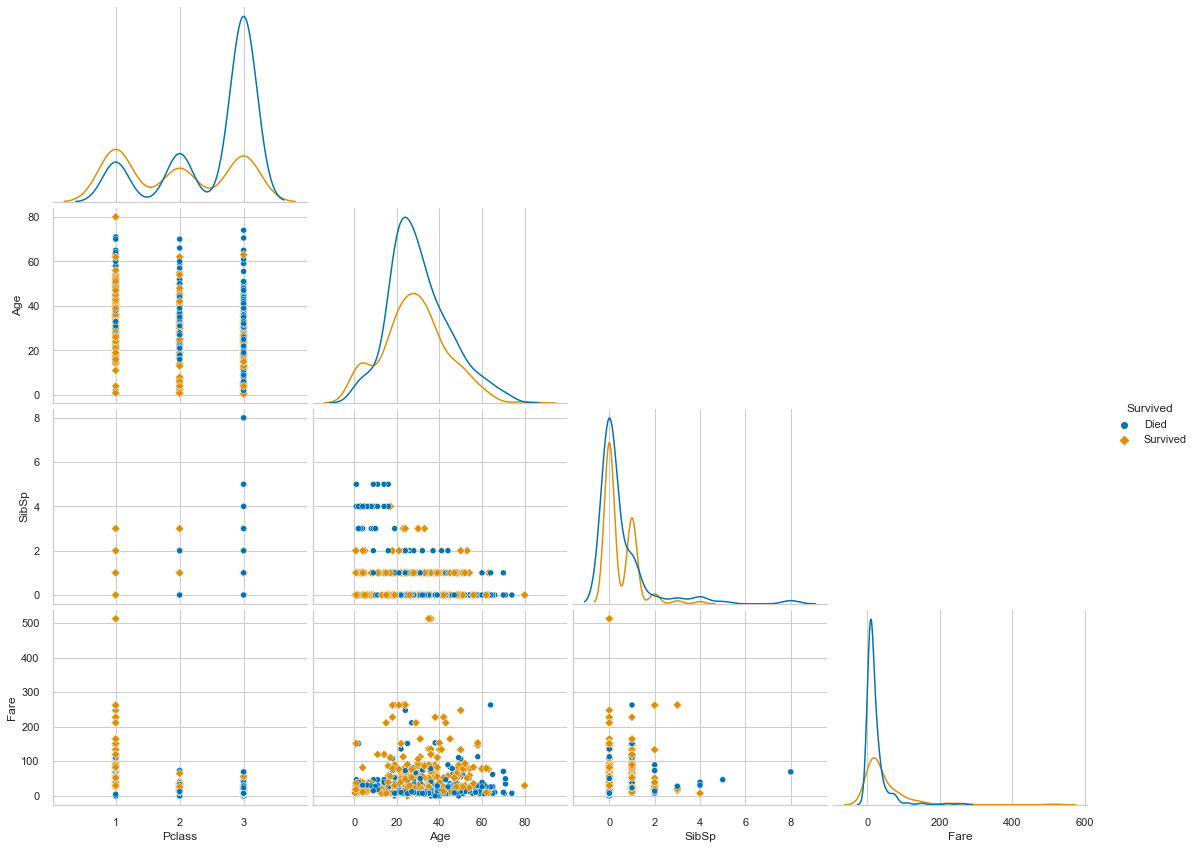

In [40]:
pairs_df = titanic_df[
    ['Pclass', 'Age', 'SibSp', 'Fare', 'Survived']].copy()
survived_map =  {0: 'Died', 1: 'Survived'}
pairs_df['Survived'] = pairs_df['Survived'].map(survived_map)
sns.pairplot(pairs_df, palette='colorblind', hue='Survived', corner=True,
             diag_kws=dict(fill=False), markers=["o", "D"], height=3, aspect=1.3) 

Those plots proves the hypothesis at SectionA. More children and 80 year old were in first class. And more, those are not against to the other explores that I had.

Section 4. Build an initial prediction model for surviving the accident.

Using the template code provided, create a model using at least six features and comment on your findings.

In [41]:
test_df = test_df[test_df['Fare'].notna()]

In [42]:
import random
random.seed(1234)

def model_x_df(df):
    predictors = ['Pclass','Parch', 'Fare', 'SibSp']
    data_x = df[predictors].copy()
    data_sex_x = pd.get_dummies(df.Sex, prefix='sex')
    data_title_group_x =  pd.get_dummies(df.titleGroup, prefix='tg')
    result = pd.concat(
        [data_x, data_sex_x
        ], axis=1)
    required_fields = [
        'Pclass', 'Age', 'Parch', 'Fare', 'SibSp', 
        'sex_female', 'sex_male'
        ,'tg_Soldiers' ,'tg_Dr' ,'tg_Royalty' ,'tg_Clergy' ,'tg_Layperson'

    ]
    for req_field in required_fields:
        if req_field not in result.columns:
             result[req_field] = 0
   
    return result[required_fields]

def model_y_1d(df):
    return df['Survived'].values.ravel()

train_x = model_x_df(titanic_df)
train_y = model_y_1d(titanic_df)

test_x = model_x_df(test_df)
test_y = model_y_1d(test_df)

print(train_x.shape)
print(test_x.shape)

(891, 12)
(417, 12)


In [43]:
basic_model = RandomForestClassifier(random_state = 1)
basic_fit = basic_model.fit(train_x, train_y)

In [44]:
def print_score(title, mean_score):
    print('{0} = {1:.1f}%'.format(title, mean_score*100))

In [45]:
cv_scores = cross_val_score(basic_fit, train_x, train_y, cv=5)
print_score('Simple Cross-Validation Score', cv_scores.mean())

Simple Cross-Validation Score = 79.8%


In [46]:
test_score = basic_fit.score(test_x, test_y)
print('Most important score!')
print_score('Test Score', test_score)

Most important score!
Test Score = 73.9%


Section 5. Tune the prediction model.

Using the template code provided, adjust the values of the hyperparameters.

In [47]:
param_name = 'max_depth'
param_range = [5, 8, 10, 15]
train_scores, cv_test_scores = validation_curve(
    RandomForestClassifier(),
    X = train_x, y = train_y, 
    param_name = param_name, 
    param_range = param_range, cv = 5)

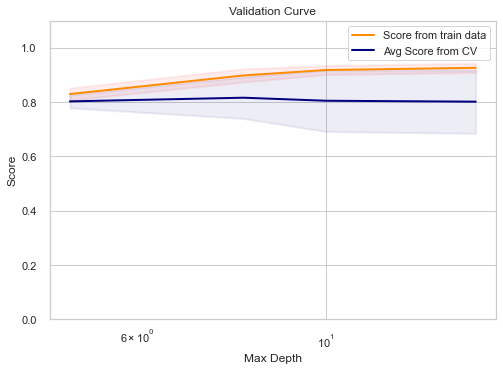

In [48]:
def plot_curve(train_scores, test_scores, title):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    cv_test_scores_mean = np.mean(cv_test_scores, axis=1)
    cv_test_scores_std = np.std(cv_test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(title) 
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Score from train data",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, 
                     train_scores_mean - (3 * train_scores_std) ,
                     train_scores_mean + (3 * train_scores_std) , alpha=0.07,
                     color="red", lw=lw)
    plt.semilogx(param_range, cv_test_scores_mean, label="Avg Score from CV",
                 color="navy", lw=lw)
    plt.fill_between(param_range, cv_test_scores_mean - (3 * cv_test_scores_std),
                     cv_test_scores_mean + (3 * cv_test_scores_std), alpha=0.07,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
plot_curve(train_scores, cv_test_scores, "Max Depth")

In [49]:
def report_best_params(title, bestFit):
    prms = bestFit.best_params_
    spacer = '-' * 40
    print(spacer)
    print(title)
    print(spacer)
    print('  Best Hyperparameter Combination')
    print('  Max Depth = {0}'.format(prms['max_depth']))
    print('  Min Samples Leaf  = {0}'.format(prms['min_samples_leaf']))
    print('  Min Samples Split = {0}'.format(prms['min_samples_split']))
    print('  Number of Estimators = {0}'.format(prms['n_estimators']))

In [50]:
import random
random.seed(2022)
hyperF = dict(
    n_estimators = [700, 800, 900, 1000, 1100], 
    max_depth = [5, 8, 10, 15],  
    min_samples_split = [2, 3, 4, 5, 10, 15, 20], 
    min_samples_leaf = [2, 5, 8, 12])
forest = RandomForestClassifier(random_state = 1)
gridF1 = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF1 = gridF1.fit(train_x, train_y)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


In [51]:
report_best_params('First Grid Search', bestF1)    

----------------------------------------
First Grid Search
----------------------------------------
  Best Hyperparameter Combination
  Max Depth = 15
  Min Samples Leaf  = 2
  Min Samples Split = 5
  Number of Estimators = 900


In [52]:
import random
random.seed(2022)
hyperF = dict(
    n_estimators = [860, 870, 890, 900, 910, 920, 930], 
    max_depth = [13, 14, 15, 16, 17],  
    min_samples_split = [3,4,5,6,7], 
    min_samples_leaf = [1, 2, 3])
forest = RandomForestClassifier(random_state = 1)
gridF2 = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, n_jobs = -1)
bestF2 = gridF2.fit(train_x, train_y)

Fitting 5 folds for each of 525 candidates, totalling 2625 fits


In [53]:
report_best_params('Second pass', bestF2)  

----------------------------------------
Second pass
----------------------------------------
  Best Hyperparameter Combination
  Max Depth = 14
  Min Samples Leaf  = 3
  Min Samples Split = 7
  Number of Estimators = 870


In [54]:
prms = bestF2.best_params_
rf_model_final = RandomForestClassifier(
    random_state = 1, 
    max_depth = prms['max_depth'],
    n_estimators = prms['n_estimators'],
    min_samples_split = prms['min_samples_split'],
    min_samples_leaf = prms['min_samples_leaf'])
random_forest = rf_model_final.fit(train_x, train_y)
train_scores = cross_val_score(random_forest, train_x, train_y, cv=5)
print_score('CV score after Grid Seach', train_scores.mean())

CV score after Grid Seach = 81.6%


In [55]:
test_score = random_forest.score(test_x, test_y)
print('Final score after optimization')
print_score('Test Score', test_score)

Final score after optimization
Test Score = 73.4%


Section 6. Final Notes.

Complete your report stating a summary of the conclusions and suggesting next steps.

In conclusion, the data showed that the survival rate is more ralated to the social status and ticket price rather than biological strength to run away such as age or gender.
If I need to improve the accuracy more, I should make more variables next, or check if there's new data to fill in the missing information.

Overall, though the data is old and there are some missing informations, I can say the prediction model works.
I learned that when I predict and use ML for the emergency survival, I should consider not only about the general information, but also about how people act and what types of people are there.